# Sheet 1 - Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Principal Component Analysis
### a

In [26]:
# TODO: implement PCA (fill in the blanks in the function below)

# DONE

def pca(data, n_components=None, printEig=False):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
    printEig: bool, if true, prints extra info about eigenvalues
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    p = data.shape[0]
    n = data.shape[1]
    
    # set n_components to p by default
    n_components = p if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    mu = data.mean(axis=1)
    data = data - mu.reshape(p,1)
    
    # compute X times X transpose
    cov = np.matmul(data, data.transpose())
    
    # compute the eigenvectors and eigenvalues
    eigVal, eigVec = np.linalg.eig(cov)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    if printEig:
        print(f"eigenvalues and sorted indices of {n_components} largest eigenvalues")
        print(eigVal)
    sort = np.argsort(eigVal)[-1:-n_components-1:-1] # get n_components sorted indices in descending order
    if printEig:
        print(sort)
    wTLambda = eigVal[sort]
    wT = eigVec[:,sort]
    components = wT.transpose()
    
    # compute X_projected, the projection of the data to the components
    X_projected = np.matmul(components,data)
    
    return components, X_projected  # return the n_components first components and the pca projection of the data

In [3]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

eigenvalues and sorted indices of 2 largest eigenvalues
[ 1.9999999 50.        18.       ]
[1 2]
Test successful!


### b
Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [4]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes
d = features.shape[0]
n = features.shape[1]

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
print("-----------------------------------------------")
print("labels and how many times they occured:")
print(np.unique(labels,return_counts=True))

# range of the different features
feat_min = np.min(features, axis=1)
feat_max = np.max(features, axis=1)

features.shape=(116, 2233), labels.shape=(2233,)
-----------------------------------------------
labels and how many times they occured:
(array([0., 1., 2.]), array([999, 864, 370]))


Normalize the data

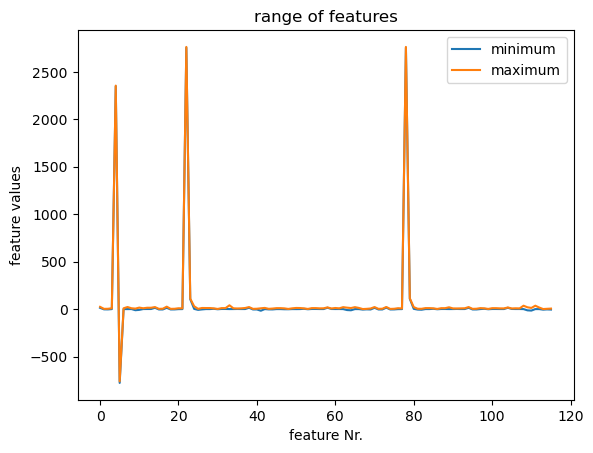

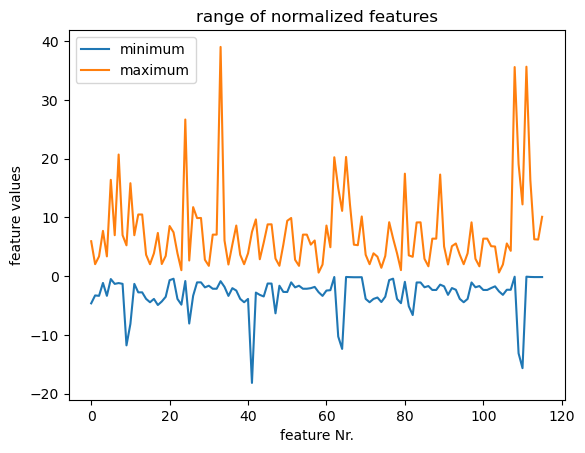

In [11]:
# TODO: report range of features and normalize the data to zero mean and unit variance

# range of features:
plt.title("range of features")
plt.xlabel("feature Nr.")
plt.ylabel("feature values")
plt.plot(feat_min,label="minimum")
plt.plot(feat_max,label="maximum")
plt.legend()
plt.show()

# normalizing
# variance
feat_std = features.std(axis=1)
features = features / feat_std.reshape(d,1)
# mean
feat_mu = features.mean(axis=1)
feat = features - feat_mu.reshape(d,1)

# range of the different normalized features
feat_min = np.min(feat, axis=1)
feat_max = np.max(feat, axis=1)
# range of normmalized features:
plt.title("range of normalized features")
plt.xlabel("feature Nr.")
plt.ylabel("feature values")
plt.plot(feat_min,label="minimum")
plt.plot(feat_max,label="maximum")
plt.legend()
plt.show()

### c

In [25]:
n_components = 2
w, feat_p = pca(feat, n_components=n_components)

eigenvalues and sorted indices of 2 largest eigenvalues
[ 3.05981949e+04+0.00000000e+00j  2.27367790e+04+0.00000000e+00j
  1.92412568e+04+0.00000000e+00j  1.76549365e+04+0.00000000e+00j
  1.52275163e+04+0.00000000e+00j  1.39600455e+04+0.00000000e+00j
  1.22948519e+04+0.00000000e+00j  1.25190696e+04+0.00000000e+00j
  1.11393309e+04+0.00000000e+00j  1.02121446e+04+0.00000000e+00j
  6.94124802e+03+0.00000000e+00j  6.78062709e+03+0.00000000e+00j
  6.54668255e+03+0.00000000e+00j  6.13251227e+03+0.00000000e+00j
  5.60270652e+03+0.00000000e+00j  5.13754733e+03+0.00000000e+00j
  4.45272380e+03+0.00000000e+00j  4.06614618e+03+0.00000000e+00j
  3.16145653e+03+0.00000000e+00j  2.96613435e+03+0.00000000e+00j
  2.56826784e+03+0.00000000e+00j  2.39373357e+03+0.00000000e+00j
  2.27920241e+03+0.00000000e+00j  2.05676069e+03+0.00000000e+00j
  2.14649665e+03+0.00000000e+00j  2.00841935e+03+0.00000000e+00j
  1.92775763e+03+0.00000000e+00j  1.87968242e+03+0.00000000e+00j
  1.79041104e+03+0.00000000e+00j  

## 2 Robust PCA

### a

In [ ]:
# load data
data = np.load('data/robust_pca_data.npy')

# TODO: Perform standard PCA and plot the first principal component in a scatter plot of the data


### b

In [ ]:
# TODO: Compute the first principal component in a robust way: Use the Tukey potential with the scale
# parameter s = on the distances. Parameterize the line with the angle φ to the x-axis. Plot the error
# as a function of φ. Interpret the two minima.

### c

In [ ]:
# TODO: Plot the potential in the scatter plot for the two minima $\varphi^*$.